In [1]:

# Dataframe
import pandas as pd

# Array
import numpy as np
import itertools

# Decompress the file
import gzip



In [17]:
# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS



In [16]:
#!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\program files\python37\python.exe -m pip install --upgrade pip' command.


In [3]:
# Datetime
from datetime import datetime

# text preprocessing
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import gensim
import re




In [165]:
#spacy.cli.download( 'en_core_web_sm' )
#!python -m pip install catboost
#!python -m pip install xgboost


In [4]:
import unicodedata
tokenizer = ToktokTokenizer()
nlp = spacy.load('en_core_web_sm')

In [5]:
## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
#from catboost import CatBoostClassifier, Pool
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [6]:
review_file = pd.read_csv('sample30.csv')

In [7]:
review_file.head(3)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive


Text(0, 0.5, 'Number of Reviews')

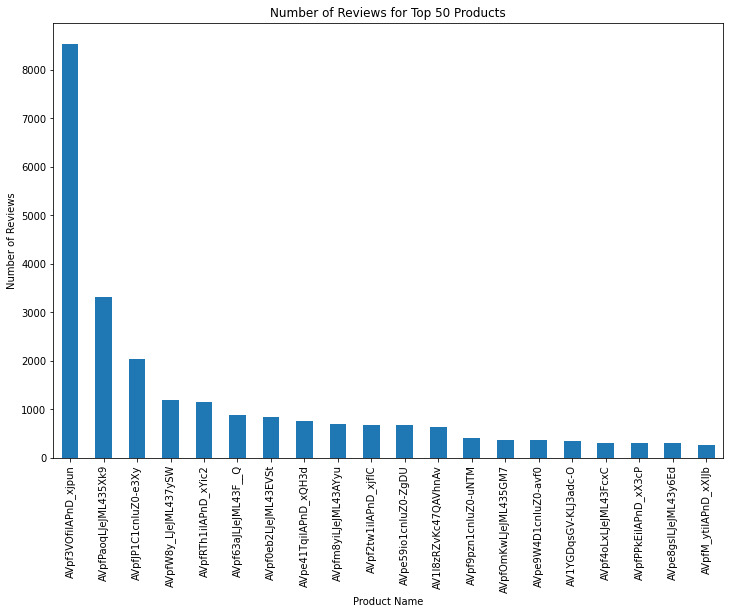

In [8]:
# PLOT NUMBER OF REVIEWS FOR TOP 20 PRODUCTS  


products = review_file["id"].value_counts()
plt.figure(figsize=(12,8))
products[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 50 Products")
plt.xlabel('Product Name')
plt.ylabel('Number of Reviews')

In [10]:
EDA_inputFile = review_file.copy()
EDA_inputFile['reviews_text'] = EDA_inputFile['reviews_text'].str.lower()
#Remove punctuations
EDA_inputFile['reviews_text'] = EDA_inputFile['reviews_text'].str.replace('[^\w\s]',' ')
#Remove spaces in between words
EDA_inputFile['reviews_text'] = EDA_inputFile['reviews_text'].str.replace(' +', ' ')
#Remove Numbers
EDA_inputFile['reviews_text']= EDA_inputFile['reviews_text'].str.replace('\d+', '')
#Remove trailing spaces
EDA_inputFile['reviews_text'] = EDA_inputFile['reviews_text'].str.strip()
#Remove URLS
EDA_inputFile['reviews_text'] =EDA_inputFile['reviews_text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [12]:
#remove stop words
stop = stopwords.words('english')
#stop.extend(["racism","alllivesmatter","amp","https","co","like","people","black","white"])
EDA_inputFile['reviews_text'] = EDA_inputFile['reviews_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop ))

#Take an example of actual Input text Vs EDA text
pd.options.display.max_colwidth = 200
print(review_file['reviews_text'].head(2))
print ("**** AFTER EDA******")
print(EDA_inputFile['reviews_text'].head(2))

0    i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just c...
1                                                                                                                                             Good flavor. This review was collected as part of a promotion.
Name: reviews_text, dtype: object
**** AFTER EDA******
0    love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphors crazy
1                                                                     good flavor review collected part promotion
Name: reviews_text, dtype: object


In [13]:
#Most commonly appearing words in a promotion 
wordcount={}
from nltk.tokenize import word_tokenize
frequencyCheck=EDA_inputFile['reviews_text'] 
for word in frequencyCheck:
    token=word_tokenize(str(word))
    for word1 in token:
        if word1 in wordcount:
            wordcount[word1] = wordcount[word1] +  1
        else: 
             wordcount[word1] = 1

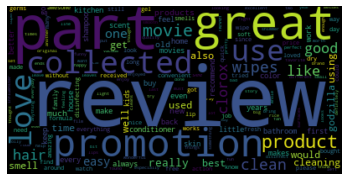

In [18]:
wc = WordCloud().generate_from_frequencies(wordcount)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [20]:
review_file = EDA_inputFile.copy()
review_file.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [21]:
review_file_req = review_file.drop(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'reviews_rating'], axis=1)

In [22]:
review_file_req['user_sentiment']

0        Positive
1        Positive
2        Positive
3        Negative
4        Negative
           ...   
29995    Positive
29996    Positive
29997    Positive
29998    Positive
29999    Positive
Name: user_sentiment, Length: 30000, dtype: object

In [23]:
review_file_req['rating_class'] = review_file_req['user_sentiment'].apply(lambda x: 0 if x == 'Negative' else 1)

In [24]:
review_file_req.columns

Index(['reviews_text', 'reviews_title', 'user_sentiment', 'rating_class'], dtype='object')

In [25]:
# Splitting the Data Set into Train and Test Sets
X = review_file_req['reviews_text']
y = review_file_req['rating_class']


In [26]:
# Splitting Dataset into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [27]:
# Print train and test set shape
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_test.shape))

Train Set Shape		:(22500,)
Test Set Shape		:(7500,)


In [28]:
def confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.ocean):
    """
    Create a confusion matrix plot for 'good' and 'bad' rating values 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt

In [29]:
def display_confusion_matrix(y_pred, model_name, vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10, 10))
    plot = confusion_matrix(cm, classes=['Bad','Good'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

In [30]:
# Create the word vector with CountVectorizer
count_vector = CountVectorizer(ngram_range=(1,1))
count_vector_train = count_vector.fit_transform(X_train)
count_vector_train = count_vector_train.toarray()
count_vector_test = count_vector.transform(X_test)
count_vector_test = count_vector_test.toarray()

In [31]:
# Print vocabulary length
print('Vocabulary length :', len(count_vector.get_feature_names()))

Vocabulary length : 15066


In [32]:
# Assign feature names of vector into a variable
vocab = count_vector.get_feature_names()

In [33]:
# Dataframe for train countvectorizer dataset
pd.DataFrame(count_vector_train, columns = vocab).head()

,aaa,aaaaaaaaaaaaaaaaa,aaaaahhhhhh,aaammmaaazing,aalot,aanyhwere,aaron,abandon,abc,abd,...,zombies,zombified,zone,zones,zoo,zoom,zow,zucchetta,zucchini,zyrtec
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
def build_model(Model, Xtrain = count_vector_train, Xtest = count_vector_test):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    mdl = model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))
    return mdl

In [35]:
clf = DummyClassifier(strategy = 'stratified', random_state =42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = f1_score(y_test, y_pred, average = 'weighted')
    
# Printing evaluation metric (f1-score) 
print("f1 score: {}".format(score))

f1 score: 0.8033625179445869


In [36]:
# Compute and print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.10      0.11      0.11       819
           1       0.89      0.89      0.89      6681

    accuracy                           0.80      7500
   macro avg       0.50      0.50      0.50      7500
weighted avg       0.80      0.80      0.80      7500



In [37]:

# Call the modeling function for logistic regression with countvectorizer and print f1 score
build_model(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg',
                                     class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_logreg = y_pred

f1 score: 0.9191266371402385


In [38]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_logreg))

              precision    recall  f1-score   support

           0       0.55      0.90      0.69       819
           1       0.99      0.91      0.95      6681

    accuracy                           0.91      7500
   macro avg       0.77      0.91      0.82      7500
weighted avg       0.94      0.91      0.92      7500



TypeError: Invalid shape (7500,) for image data

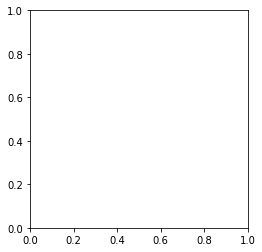

In [39]:
# Print confusion matrix for logistic regression with countvectorizer
display_confusion_matrix(y_pred_cv_logreg, "Logistic Regression")

In [ ]:

# Call the modeling function for random forest classifier with countvectorizer and print f1 score
build_model(RandomForestClassifier(n_estimators = 200, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_rf = y_pred

In [ ]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_rf))

In [ ]:
# Print confusion matrix for random forest classifier with countVectorizer
display_confusion_matrix(y_pred_cv_rf, "Random Forest")

In [ ]:
# Call the modeling function for naive bayes with countvectorizer and print f1 score
build_model(MultinomialNB())

# Assign y_pred to a variable for further process
y_pred_cv_nb = y_pred

In [ ]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_nb))

In [ ]:
# Print confusion matrix for naive bayes with countVectorizer
display_confusion_matrix(y_pred_cv_nb, "Naive Bayes")

In [ ]:
# Call the modeling function for XGBoost with countvectorizer and print f1 score
build_model(XGBClassifier())

# Assign y_pred to a variable for further process
y_pred_cv_xgb = y_pred

In [ ]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_xgb))

In [ ]:
# Print confusion matrix for gradient boosting with countVectorizer
display_confusion_matrix(y_pred_cv_xgb, "XGBoost")

In [ ]:
# Function for converting the "classification report" results to a dataframe
def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['weighted avg'] = avg

    return class_report_df.T

# Function for adding explanatory columns and organizing all dataframe
def comparison_matrix(y_test, y_pred, label, vector):
    df = pandas_classification_report(y_test, y_pred)
    df['class']=['bad', 'good', 'average']
    df['accuracy']= metrics.accuracy_score(y_test, y_pred)
    df['model'] = label
    df['vectorizer'] = vector
    df = df[['vectorizer', 'model', 'accuracy', 'class', 'precision', 'recall', 'f1-score', 'support']]
    return df

In [ ]:
#For loop for using "comparison functions" 

def comparison_table(y_preds, labels):
    
    # empty list for collecting dataframes
    frames_tv = [] 
    
    # list for y_preds
    y_preds_tv = y_preds
    
    # list for labels
    labels_tv = labels  
    
    vector_tv = 'CountVect'
    
    for y_pred, label in zip(y_preds_tv, labels_tv):
        df = comparison_matrix(y_test, y_pred, label, vector_tv)
        frames_tv.append(df)

    # concatenating all dataframes
    global df_tv
    df_tv = pd.concat(frames_tv)
    
    global df_tv2
    df_tv2 = df_tv.set_index(['vectorizer', 'model', 'accuracy', 'class'])

In [ ]:
def f1_score_bar_plot(df, category, title):
    df = df[df['class']==category]
    x = list(df['model'])
    y = list(df['f1-score'])
    y_round = list(round(df['f1-score'],2))
    a = (list(df['f1-score'])).index(max(list(df['f1-score'])))
    z = (list(df['f1-score'])).index(min(list(df['f1-score'])))
    y_mean = round(df['f1-score'].mean(),2)
    
    plt.rcParams['figure.figsize']=[15,5]
    b_plot = plt.bar(x=x,height=y)
    b_plot[a].set_color('g')
    b_plot[z].set_color('r')
    
    for i,v in enumerate(y_round):
        plt.text(i-.15,0.018,str(v), color='black', fontsize=15, fontweight='bold')
    
    plt.axhline(y_mean,ls='--',color='k',label=y_mean)
    plt.title(title)
    plt.legend()
    
    return plt.show()

In [ ]:
comparison_table(y_preds = [y_pred_cv_logreg, y_pred_cv_rf, y_pred_cv_nb, y_pred_cv_xgb], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost'])

In [ ]:
df_tv2

In [ ]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average f1 Score")

In [ ]:

# Create the word vector with TF-IDF Vectorizer
tfidf_vector = TfidfVectorizer(ngram_range=(1, 1))
tfidf_vector_train = tfidf_vector.fit_transform(X_train)
tfidf_vector_train = tfidf_vector_train.toarray()
tfidf_vector_test = tfidf_vector.transform(X_test)
tfidf_vector_test = tfidf_vector_test.toarray()

In [ ]:
# Call the modeling function for logistic regression with TF-IDF and print f1 score
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', 
                            class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42), 
                            tfidf_vector_train, tfidf_vector_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_logreg = y_pred

In [ ]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_logreg))


In [ ]:
# Print confusion matrix for logistic regression with TF-IDF
display_confusion_matrix(y_pred_tfidf_logreg, "Logistic Regression", "TF-IDF")

In [ ]:
# Call the modeling function for random forest classifier with TF-IDF and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42), 
         tfidf_vector_train, tfidf_vector_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_rf = y_pred

In [ ]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_rf))

In [ ]:

# Print confusion matrix for random forest classifier with TF-IDF
display_confusion_matrix(y_pred_tfidf_rf, "Random Forest", "TF-IDF")

In [ ]:
# Call the modeling function for naive bayes with TF-IDF and print f1 score
modeling(MultinomialNB(), tfidf_vector_train, tfidf_vector_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_nb = y_pred

In [ ]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_nb))

In [ ]:
# Print confusion matrix for naive bayes with TF-IDF
display_confusion_matrix(y_pred_tfidf_nb, "Naive Bayes", "TF-IDF")

In [ ]:
#!pip install joblib

In [ ]:
import joblib
# Call the modeling function for XGBoost with TF-IDF and print f1 score
#xgb_clf = modeling(XGBClassifier(), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_xgb = y_pred
joblib.dump(xgb_clf, 'sentiment_classification_model.pkl')

In [ ]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_xgb))

In [ ]:
# Print confusion matrix for XGBoost with TF-IDF
display_confusion_matrix(y_pred_tfidf_xgb, "XGBoost", "TF-IDF")

In [ ]:
comparison_table(y_preds = [y_pred_tfidf_logreg, y_pred_tfidf_rf, y_pred_tfidf_nb, y_pred_tfidf_xgb], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost'])

In [ ]:
# Print the comparision matrix
print('\nComparision Matrix of Models with TF-IDF Vectorizer\n')
df_tv2

In [ ]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average F1 Score")

In [ ]:
# Create the word vector with TF-IDF Vectorizer
tfidf_vector = TfidfVectorizer(ngram_range=(1, 1))
tfidf_vector_train = tfidf_vector.fit_transform(X_train)
tfidf_vector_train = tfidf_vector_train.toarray()
count_vector_test = count_vector.transform(X)
count_vector_test = count_vector_test.toarray()
tfidf_vector_train.shape


In [ ]:
df_prd = pd.DataFrame(xgb_clf.predict(count_vector_test),columns=['class_predicted'])

In [ ]:
X

In [ ]:
df_prd = pd.concat([review_file[['id', 'name']], df_prd],axis=1)

In [ ]:
classicationbymodel= pd.DataFrame(class_predicted,columns=['class_predicted'])

In [ ]:
df_prd

In [ ]:
pd.to_pickle(df_prd, "Sentimantlookupfile.pkl")

In [ ]:
df_prd['class_predicted'].value_counts()

In [ ]:
df_prd.loc[(df_prd.id == "AV14LG0R-jtxr-f38QfS") ]

In [ ]:
pd.to_pickle(df_prd, "Sentimantlookupfile.pkl")